In [1]:
# initial setup
%run "../../../common/0_notebooks_base_setup.py"


/Users/csuarezgurruchaga/Desktop/Digital-House/CLASE_34/dsad_2021/common
default checking
Running command `conda list`... ok
jupyterlab=2.2.6 already installed
pandas=1.1.5 already installed
bokeh=2.2.3 already installed
seaborn=0.11.0 already installed
matplotlib=3.3.2 already installed
ipywidgets=7.5.1 already installed
pytest=6.2.1 already installed
chardet=4.0.0 already installed
psutil=5.7.2 already installed
scipy=1.5.2 already installed
statsmodels=0.12.1 already installed
scikit-learn=0.23.2 already installed
xlrd=2.0.1 already installed
Running command `conda install --yes nltk=3.5.0`... ok
Solving environment: ...working... done

# All requested packages already installed.


unidecode=1.1.1 already installed
pydotplus=2.0.2 already installed
pandas-datareader=0.9.0 already installed
flask=1.1.2 already installed


---

<img src='../../../common/logo_DH.png' align='left' width=35%/>


# Algoritmos de Árboles de Decisión - Parte I

<a id="section_toc"></a> 
## Tabla de Contenidos

[Introducción](#section_intro)

[Árboles de Decisión Simples (CART)](#section_CART)
- [Beneficios](#section_beneficios)
- [Desventajas](#section_desventazas)

[Marco Teórico](#section_mteorico)

[Cómo funcionan los algoritmos CART](#section_algoritmo)

[Cómo seleccionar la mejor partición](#section_mejor_particion)
- [Criterio de partición de Gini](#section_gini)
- [Criterio de partición de Chi-Cuadrado](#section_chi_cuadrado)
- [Criterio de partición de Entropía](#section_entropia)
- [Criterio de partición de Reducción de Varianza](#section_reduccion_varianza)

[Underfitting y Overfitting](#section_overfitting)  

[Optimizando Performance de los Árboles de Decisión](#section_optimizacion)

[Referencias](#section_referencias)



<a id="section_intro"></a> 
## Introducción
Los algoritmos de Árboles de Decisión pertenecen al tipo de algoritmos de aprendizaje supervisado, y si bien pueden ser utilizados para regresiones, son principalmente utilizados en problemas de clasificación.  
  
Existen varios tipos de árboles de decisión:

- Árboles de decisión simples:  
    - **Árboles de clasificación:** realizan predicciones sobre una variable **categórica**  
    - **Árboles de regresión:** realizan predicciones sobre una variable **contínua**   
    
    
- Árboles de decisión basados en técnicas avanzadas de Ensamble (próxima clase!):
    - **Bagging** 
    - **Random Forest**  
    - **Boosting**  
        - **Gradient Boosting**
        - **ADA Boost**  
        - **XG Boost**  

<a id="section_CART"></a> 
## Árboles de decisión simples 
A este tipo de árboles simples se lo suele llamar **CART** (**C**lassification and **R**egression **T**rees) o bien **ACR** (**Á**rboles de **C**lasificación y **R**egresión)
  
A continuación veremos un ejemplo simple de la utilización de árboles de decisión para definir a partir del peso y la altura si una persona adulta es de sexo masculino o femenino.

<img style="float: center;" src="img/Ejemplo_CART.png">

Como podemos observar, un árbol de decisión no es más que un conjunto de reglas:
* If Altura > 180 cm Then Hombre
* If Altura <= 180 cm AND Peso > 80 kg Then Hombre
* If Altura <= 180 cm AND Peso <= 80 kg Then Mujer

Por supuesto existen mujeres que miden más de 1,80m o mujeres que pesen más de 80 kg, pero es importante recordar que los modelos predictivos no buscan ser infalibles sino que buscan poder predecir o clasificar con un determinado grado de precisión que sea aceptable para el uso que se le quiere dar.

En el ejemplo anterior, el árbol de decisión ya vino dado. Sin embargo, como veremos en breve, es tarea de los algoritmos de ACR justamente definir a partir de los datos de entrada cuál atributo es conveniente utilizar en cada nodo del árbol, y cuál es el punto de corte óptimo en dicho nodo para realizar las particiones de forma tal de lograr obtener el árbol de clasificación con la mayor precisión posible.


<a id="section_beneficios"></a> 
### Beneficios de la implementación de Árboles de Decisión:
- Son fáciles de interpretar, y pueden ser representados gráficamente.
- Pueden capturar patrones no lineales.
- Pueden manejar datos numéricos y categóricos. Pueden manejar variables categóricas sin necesidad de implementar one hot encoding.
- Requieren menos preparación de los datos. No es necesario normalizar el dataset.


<a id="section_desventajas"></a> 
### Desventajas:
- No son robustos ya que son muy sensibles a los cambios en el dataset. Un pequeño cambio del dataset, puede generar un árbol completamente distinto.
- Tienen tendencia a Sobreajuste (Overfitting).
- La precisión suele disminuir para variables continuas.
- Existen otros modelos que presentan mayor precisión.
- Los árboles de decisión suelen verse muy afectados por datasets que no estén balanceados.
- El óptimo global no está garantizado: dado que en cada paso se busca maximizar la ganancia de información, esta metodología no necesariamente puede garantizar el resultado óptimo global.

<a id="section_desventajas"></a> 
## Marco teórico
Un árbol de decisión tiene la siguiente apariencia:

<img style="float: center;" src="img/Arboles-de-decision-001.png">  


  
  
Un árbol de decisión es una estructura similar a un diagrama de flujo, es por eso que los árboles de decisión son fáciles de entender e interpretar. Los árboles están compuestos por las siguientes partes:
- Cada **Nodo de decisión** representa una característica (o atributo), 
- Cada **Rama** representa una regla de decisión. 
- Cada **nodo Hoja** representa el resultado.
- Al nodo superior en un árbol de decisión se lo conoce como el **nodo raíz**.
- Al nodo del cual se desprenden otros nodos se lo llama **nodo padre** y a los nodos que se desprenden del nodo padre se los llama **nodos hijo**
- Cada rama que no sea un nodo hoja se la puede considerar como un **sub-árbol**.

<a id="section_algoritmo"></a> 
## ¿Cómo funcionan los algoritmos de árboles de decisión?
La idea básica detrás de cualquier algoritmo de árbol de decisión es ir particionando la población inicial en poblaciones más chicas que no se solapen y que sean más homogéneas que la población inicial a fin de que aumenten las posibilidades de predecir la variable objetivo.

Los algoritmos ACR realizan ésto, mediante los siguientes pasos: 

1. *Seleccionar la mejor Partición*: de todos los atributos, seleccionar cuál es aquél que divide la población en segmentos más pequeños y homogéneos (o puros) posibles. 
2. *Particionar*: Crear un nodo de decisión con ese atributo y dividir la población generando nuevos nodos hijos. 
3. Repetir el proceso para cada nodo hijo de manera recursiva hasta que ocurra cualquiera de las siguientes condiciones:

    - Todos los nodos hijos sean puros
    
    - No queden más atributos para particionar (si el nodo hoja no es puro, para predecir se utiliza la moda del nodo en el caso de variables categóricas y la media en el caso de variables numéricas)  
    
    - Se aplique un método de corte preestablecido (por ejemplo indicando la profundidad máxima del árbol)

Utilizando el ejemplo anterior del árbol de decisión que clasifica si una persona adulta es mujer u hombre, vamos a ver con un dataset ficticio cómo son los pasos del algoritmo ACR para seleccionar con qué atributos (Features) comenzar a particionar la población en cada nodo de manera que estas particiones sean lo más puras posible. Veremos también que el algoritmo se dice que es voraz o avaro ("greedy") en el sentido que en cada paso que da busca obtener la mejor partición posible en ese nodo, sin ser estas particiones necesariamente la mejores cuando uno mira el árbol en todo su conjunto.


In [2]:
#importamos las librerias que vamos a estar utilizando
import pandas as pd
import numpy as np
from IPython.display import Image


In [3]:
#importamos el dataset ficticio, que utilizaremos para nuestro ejemplo
df=pd.read_csv("../Data/ejemploCART.csv")
display(df.head(3))
print()
pd.DataFrame(df.dtypes,columns=['dtypes'])

,Pelo corto,Peso,Estatura,Sexo
0,False,78,181,M
1,True,82,182,M
2,False,75,162,M


,dtypes
Pelo corto,bool
Peso,int64
Estatura,int64
Sexo,object


observamos que el dataset contiene 4 columnas:
- **Pelo corto:** es una variable de tipo booleana
- **Peso:** es una variable de tipo entero. Indica el peso en Kg.
- **Estatura:** es una variable de tipo entero. Indica la altura en cm.
- **Sexo:** es una variable tipo object. Toma los valores H para hombre y M para Mujer.

Para este estadío de la explicación vamos a hacer que tanto la columna "Peso" como la columna "Estatura" sean categóricas en lugar de continuas. Para ello vamos a definir que "Peso" es True si es mayor que 80 kg, y "Estatura" es True si es mayor que 180 cm.  
Adicionalmente dado que la columna Sexo solo puede tomar 2 valores M o H, convertimos el tipo de dato de object a categorical, que es una buena práctica para hacer mejor uso de memoria. 

In [4]:
df["Peso"]=df["Peso"].apply(lambda x: x>80)
df["Estatura"]=df["Estatura"].apply(lambda x: x>180)
df['Sexo']= df.Sexo.astype('category')
display(df.head(3))
print()
pd.DataFrame(df.dtypes,columns=['dtypes'])

,Pelo corto,Peso,Estatura,Sexo
0,False,False,True,M
1,True,True,True,M
2,False,False,False,M


,dtypes
Pelo corto,bool
Peso,bool
Estatura,bool
Sexo,category


Analizamos ahora cómo está conformado el dataset:

In [5]:
df.groupby(['Sexo']).count()

,Pelo corto,Peso,Estatura
Sexo,,,
H,10,10,10
M,10,10,10


Vemos entonces que antes de hacer ninguna partición tenemos que la población total es de 20 personas, siendo:
* 10 mujeres
* 10 hombres  

Por lo que si tratamos de predecir el sexo de una persona, tenemos un 50% de probabilidad de éxito.

A continuación vamos a ver cuál variable independiente (Pelo corto, Peso o Estatura) es la que logra particionar la población de una manera más homogenea, de manera que mejore nuestras probabilidades de predecir el sexo de la persona. 
  


1. Comenzamos particionando la población por el atributo de "Peso"

<img style="float: center;" src="img/Split_Peso.png">

In [6]:
# realizamos el mismo análisis en python.
df_peso = df.groupby(['Peso','Sexo'])[['Sexo']].count()
df_peso = df_peso.rename(columns = {'Sexo':'Count'})
df_peso.loc[False,'p']= df_peso.loc[False,'Count'].values / df_peso.loc[False,'Count'].sum()
df_peso.loc[True,'p']= df_peso.loc[True,'Count'].values / df_peso.loc[True,'Count'].sum()
display(df_peso)


Count         p
Peso  Sexo                 
False H         6  0.428571
      M         8  0.571429
True  H         4  0.666667
      M         2  0.333333

2. Continuamos ahora particionando con el atributo de "Estatura"

<img style="float: center;" src="img/Split_estatura.png">

In [7]:
# realizamos el mismo análisis en python.
df_estatura = df.groupby(['Estatura','Sexo'])[['Sexo']].count()
df_estatura = df_estatura.rename(columns = {'Sexo':'Count'})
df_estatura.loc[False,'p']= df_estatura.loc[False,'Count'].values / df_estatura.loc[False,'Count'].sum()
df_estatura.loc[True,'p']= df_estatura.loc[True,'Count'].values / df_estatura.loc[True,'Count'].sum()
display(df_estatura)


Count         p
Estatura Sexo                 
False    H         4  0.333333
         M         8  0.666667
True     H         6  0.750000
         M         2  0.250000

3. Finalmente particionamos utilizando el atributo de "Pelo corto":

<img style="float: center;" src="img/Split_PC.png">

In [8]:
# realizamos el mismo análisis en python.
df_pc = df.groupby(['Pelo corto','Sexo'])[['Sexo']].count()
df_pc = df_pc.rename(columns = {'Sexo':'Count'})
df_pc.loc[False,'p']= df_pc.loc[False,'Count'].values / df_pc.loc[False,'Count'].sum()
df_pc.loc[True,'p']= df_pc.loc[True,'Count'].values / df_pc.loc[True,'Count'].sum()
display(df_pc)


Count    p
Pelo corto Sexo            
False      H         2  0.2
           M         8  0.8
True       H         8  0.8
           M         2  0.2

Luego de hacer el split utilizando todas las variables independientes, podemos comparar cuál es la que me permite predecir mejor si la persona es hombre o mujer.

En el primer caso que particionamos por **"Peso"**, vimos que los nodos hijos son casi tan heterogéneos como la población total. Es decir esta partición no está aumentando de forma considerable las probabilidades de mejorar la predicción.

En el segundo caso donde se particionó utilizando el atributo **"Estatura"** logramos cierto grado de homogeneidad en los nodos hijos, con lo cual estamos en mejores condiciones de predecir el sexo de una persona luego de haber contestado a la pregunta si la persona mide más de 180 cm comparado a cómo estaba inicialmente antes de contestar dicha pregunta. 

El tercer caso es igual al segundo, pero logrando incluso mayor homogeneidad en los nodos hijos. Con lo cual la probabilidad de poder predecir correctamente el sexo de una persona luego de contestar a la pregunta si tiene pelo corto es del 80%, que es notablemente mejor que el 50% de probabilidad de adivinar el sexo que teníamos antes de realizar la pregunta.

Observamos entonces que particionando a la población según los distintos atributos, puede aumentar la precisión en la clasificación. Vemos también que dicha precisión va a depender del atributo que selecionemos para realizar la partición, siendo el mejor atributo para particionar aquel que logra que los nodos hijos sean lo más homogéneos (puros) posibles.  

Por lo tanto, como se mencionó anteriormente, la tarea de los algoritmos de árboles de decisión es generar un árbol de decisión que permita predecir la variable dependiente de la siguiente manera:
1. determinando cuál es el atributo que mejor particiona la población 
2. realizando la partición con dicho atributo
3. repitiendo el proceso recursivamente para cada nodo hijo

Veremos a continuación cómo el algoritmo decide cuál es el mejor atributo para particionar en cada nodo.

<a id="section_particion"></a> 
### ¿Cómo seleccionar la mejor partición?
Buscamos que las particiones (splits) generen nodos hijos con la menor impureza posible (o dicho de otra forma, la mayor pureza posible). Existen distintos métodos para evaluar la efectividad de las particiones:
- Índice de Gini
- Test Chi-cuadrado
- Entropía / Ganancia de información 
- Reducción de Varianza

La selección de criterios de decisión dependerá de si los árboles son de clasificación o regresión



| |Regresión  | Clasificación  | 
|:--|:--|:--|
|Variable dependiente|**Continua**|**Categórica**|  
|Criterio de Partición| **Reducción de Varianza**|**Inpureza de Gini** (solo particiones binarias)<br>**Chi-Cuadrado** para particiones de orden mayor a 2<br>**Entropía**|
| Valores de los nodos terminales |la **media** de las observaciones en esa región | la **moda** de las observaciones del conjunto de entrenamiento que han “caído” en esa región| 

<a id="section_gini"></a> 
### Criterio de partición de Gini
El índice de Gini se utiliza en algoritmos de árboles de Decisión de **clasificación**. Siendo el objetivo de los modelos de clasificación poder predecir con la mayor precisión posible la clase a la que pertenece cada observación.

Sólo funciona con variables objetivo (o variables dependientes) categóricas, y si bien solamente permite particiones binarias, puede ser utilizado en problemas de clasificación multi-clase. 

#### "El indice de Gini, nos dice cual es la probabilidad de que clasifiquemos de forma incorrecta un punto del dataset"

El índice de Gini se mide para cada nodo de decisión como la probabilidad P(j|t), que es la probabilidad de pertenecer a la clase "j" estando en el nodo "t". En otras palabras, mide la pureza del nodo.


$$
\begin{aligned}
Gini(t) = \sum_{j=1}^{n} [p(j|t))]^{2} = (p_{1}^{2}+p_{2}^{2}+...+p_{n}^{2})
\end{aligned}
$$

Por otro lado, la impureza de Gini la medimos de la siguiente manera:

$$
\begin{aligned}
Impureza\,de\,Gini(t) = 1 - Gini(t)
\end{aligned}
$$

Habiendo calculado la impureza de Gini para cada nodo hijo, podemos calcular el valor total de la impureza de Gini del nodo padre como el promedio ponderado de las impurezas de Gini para cada nodo hijo.

$$
\begin{aligned}
Impureza\,de\,Gini_{split} = \frac{1}{n}\sum_{i=1}^{k}n_{i}\cdot impureza\,de\,Gini(i)
\end{aligned}
$$

Siendo $n_{i}$ la población de cada nodo hijo, y n la población de la sumatoria de los nodos hijos.  

Después de calcular el valor total de la impureza de Gini para el nodo padre para cada uno de los atributos, elegimos aquel atributo que tenga el valor de impureza de Gini más bajo (es decir, el que consigue que los nodos hijos sean lo más puros posibles). Ésto se repite recursivamente por cada nodo hijo.

Hacemos los cálculos para determinar la impureza de Gini para cada partición posible.

In [9]:
print("""
----------------
atributo: PESO
----------------

""")
# definimos una nueva columna que tenga la probabilidad al cuadrado.
df_peso['p2'] = df_peso['p']**2

# siguiendo la formula de Gini, calculamos la impureza de Gini para cada nodo hijo 
imp_gini_false = 1 - df_peso.loc[False,'p2'].sum()
imp_gini_true  = 1 - df_peso.loc[True,'p2'].sum()

# creamos un dataframe con los valores de las impurezas de Gini recién calculadas para cada nodo hijo.
df_gini = pd.DataFrame(index = [False,True],columns=['Impureza Gini'], data=[imp_gini_false,imp_gini_true])
display(df_gini)

# finalmente calculamos el Gini de la partición utilizando el atributo PESO, 
# como el promedio ponderado de las impurezas de Gini de los nodos hijos
Gini_split = 1/20 * ((6+8)*imp_gini_false + (4+2)*imp_gini_true)


print("\nGini split: ",Gini_split)
print()


----------------
atributo: PESO
----------------




,Impureza Gini
False,0.489796
True,0.444444



Gini split:  0.4761904761904763



In [10]:
print("""
--------------------
atributo: ESTATURA
--------------------

""")
# definimos una nueva columna que tenga la probabilidad al cuadrado.
df_estatura['p2'] = df_estatura['p']**2

# siguiendo la formula de Gini, calculamos la impureza de Gini para cada nodo hijo 
imp_gini_false = 1 - df_estatura.loc[False,'p2'].sum()
imp_gini_true  = 1 - df_estatura.loc[True,'p2'].sum()

# creamos un dataframe con los valores de las impurezas de Gini recién calculadas para cada nodo hijo.
df_gini = pd.DataFrame(index = [False,True],columns=['Impureza Gini'], data=[imp_gini_false,imp_gini_true])
display(df_gini)

# finalmente calculamos el Gini de la partición utilizando el atributo ESTATURA, 
# como el promedio ponderado de las impurezas de Gini de los nodos hijos
Gini_split = 1/20 * ((6+8)*imp_gini_false + (4+2)*imp_gini_true)

print("\nGini split: ",Gini_split)
print()


--------------------
atributo: ESTATURA
--------------------




,Impureza Gini
False,0.444444
True,0.375000



Gini split:  0.4236111111111111



In [11]:
print("""
----------------------
atributo: PELO CORTO
----------------------

""")
# definimos una nueva columna que tenga la probabilidad al cuadrado.
df_pc['p2'] = df_pc['p']**2

# siguiendo la formula de Gini, calculamos la impureza de Gini para cada nodo hijo 
imp_gini_false = 1 - df_pc.loc[False,'p2'].sum()
imp_gini_true  = 1 - df_pc.loc[True,'p2'].sum()

# creamos un dataframe con los valores de las impurezas de Gini recién calculadas para cada nodo hijo.
df_gini = pd.DataFrame(index = [False,True],columns=['Impureza Gini'], data=[imp_gini_false,imp_gini_true])
display(df_gini)

# finalmente calculamos el Gini de la partición utilizando el atributo PELO CORTO, 
# como el promedio ponderado de las impurezas de Gini de los nodos hijos
Gini_split = 1/20 * ((6+8)*imp_gini_false + (4+2)*imp_gini_true)

print("\nGini split: ",Gini_split)
print()


----------------------
atributo: PELO CORTO
----------------------




,Impureza Gini
False,0.32
True,0.32



Gini split:  0.31999999999999984



Ponemos todos los posibles valores de la Impureza de Gini para cada partición y seleccionamos aquella partición que minimiza la impureza de Gini.

|  | Impureza de Gini |
|--------------------|:----------------:|
| Peso > 80 kg: | 0,48 |
| Estatura > 180 cm: | 0,42 |
| Pelo Corto: | 0,32 |
  
    
Recordamos que la mejor partición es aquella cuyo índice de impureza de Gini es menor, entonces el atributo que genera la mejor partición es "Pelo Corto". Vemos por lo tanto, que utilizando el método de partición de Gini, precisamente arribamos a la misma conclusión a la que habíamos arribado anteriormente en forma intuitiva. 

<a id="section_chi_cuadrado"></a> 
### Chi-Cuadrado
Al igual que el método de la impureza de Gini, sólo sirve para modelos de clasificación. Sin embargo posee una importante diferencia ya que permite realizar 2 o más particiones en cada nodo.
**A mayor valor de Chi-cuadrado, mayor grado de homogeneidad o pureza de los nodos.**

Cada nodo hijo, va a tener tantos valores de Chi-Cuadrado como clases. La formula de Chi Cuadrado para un nodo hijo es la siguiente:

$$
\begin{aligned}
Chi\_Cuadrado\ _{clase\_i} = \sqrt{\frac{(Valor\,Actual - Valor\,Esperado)^{2}}{Valor\,Esperado}}
\end{aligned}
$$

siendo:  
- Valor Actual: Es la cantidad de ocurrencias de la clase i en el nodo hijo.
- Valor Esperado: Es el valor esperado de ocurrencias de la clase i en el nodo hijo, basado en la distribución del nodo padre.

y siendo el **valor de Chi Cuadrado total** del nodo padre, la sumatoria de todos los valores de Chi Cuadrado de los nodos hijos.

Veamos cómo se aplica a nuestro ejemplo anterior de la clasificacion de un grupo de personas según su sexo.


1. Comenzamos particionando la población por el atributo de "Peso"

<img style="float: center;" src="img/peso_chi.png">

Observamos que los valores Actuales están dados por la cantidad de individuos que hay en cada clase (hombres y mujeres) en cada uno de los nodos hijos. Mientras que los valores Esperados están dados luego de aplicar la probabilidad de ocurrencia de cada clase en el nodo padre a los nodos hijos. En el ejemplo, el nodo padre tiene 50% probabilidad de ser Hombre y 50% probabilidad de ser Mujer.   

Por lo tanto, en el nodo hijo para Peso >80 kg del total de 6 personas, el valor esperado de Hombres y Mujeres es 3. Del mismo modo, para el nodo hijo de Peso <= 80, cuya cantidad de personas es 14, los valores esperados de Hombres y Mujeres ambos son 7.

<img style="float: center;" src="img/peso_chi_tabla.png">

2. Comenzamos particionando la población por el atributo de "Estatura"

<img style="float: center;" src="img/estatura_chi.png">



<img style="float: center;" src="img/estatura_chi_tabla.png">

3. Comenzamos particionando la población por el atributo de "Pelo Corto"

<img style="float: center;" src="img/pelo_chi.png">

<img style="float: center;" src="img/pelo_chi_tabla.png">

Queda en evidencia que particionando por Chi-Cuadrado obtenemos los mismos resultados que con Gini, pero este último método posee la ventaja de poder realizar particiones mayores a 2.

<a id="section_Entropia"></a> 
### Ganancia de Información
La ganancia de Información al igual que Gini y Chi-Cuadrado es utilizado para modelos de clasificación. En este método se busca medir la ganancia de información que se obtiene luego de realizar una pregunta y para ésto utiliza una medición de Entropía que pasaremos a explicar en breve. Como ya vimos, no es lo mismo realizar una pregunta basado en un atributo que basado en otro ya que dependiendo del atributo que seleccionamos para hacer la partición, tendremos mayor o menor ganancia de información. Para poder profundizar en este concepto, primero explicaremos que es Entropía.

#### Entropía

##### "Cuanta varianza tienen los datos?"

En teoría de la información se define Entropía como una forma de medir el grado de desorganización en un sistema. Es decir la Entropía busca medir qué tan parecidos o qué tan diferentes son los elementos de un sistema:
- utilizando el valor mínimo de 0 para conjunto de elementos que son totalmente iguales, 
- utilizando el valor máximo de 1 para los conjuntos que poseen el mayor grado de desorden posible, 
- utilizando los valores entre 0 y 1 para aquellos sistemas que presenten un grado de desorden que esté entre los extremos recien mencionados.

<img style="float: center;" src="img/entropia2.png">

Matemáticamente ésto se representa con la siguiente fórmula:

$$
\begin{aligned}
Entropia = -p{_{1}}log{_{2}}(p{_{1}}) -p{_{2}}log{_{2}}(p{_{2}}) - ... -p{_{n}}log{_{2}}(p{_{n}}) = -\sum p{_{n}}log{_{2}}(p{_{n}})
\end{aligned}
$$

donde:  $p_{i}$ es la proporción de elementos de la $clase_{i}$ en el nodo.

Por otro lado, definimos a la Ganancia de Información como:

$$
\begin{aligned}
Ganancia\ de\ Informacion = Entropia{_{nodo\ padre}} - Suma\ ponderada\ Entropia{_{nodos\ hijos}}
\end{aligned}
$$

Con el marco teórico anterior, podemos entonces volver a analizar nuestro caso ejemplo.

<img style="float: center;" src="img/peso_h.png">
<img style="float: center;" src="img/peso_h_t.png">
<img style="float: center;" src="img/estatura_h.png">
<img style="float: center;" src="img/estatura_h_t.png">
<img style="float: center;" src="img/pelo_h.png">
<img style="float: center;" src="img/pelo_h_t.png">

Vemos entonces como al utilizar la medición de Ganancia de Información arribamos a la misma conclusión que el atributo de Pelo Corto es el más conveniente para realizar la primera partición. 

A continuación, veremos cómo podemos utilizar la librería de `tree` de `scikit learn` para construir los árboles de decisión. Veremos ejemplos utilizando solamente el método de Gini y el método de Entropía para realizar las particiones, ya que dicha librería no tiene implementada la partición por Chi-cuadrado.

In [12]:
#importamos las librerías que utilizaremos
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
%matplotlib inline

#importo el dataset que utilizamos durante los ejemplos
df=pd.read_csv("../Data/ejemploCART.csv")
df["Peso"]=df["Peso"].apply(lambda x: x>80)
df["Estatura"]=df["Estatura"].apply(lambda x: x>180)

# separamos las variables independientes de la variable objetivo en las variables "x" e "y", respectivamente.
X = df.iloc[:,:-1].values
y = df.iloc[:,-1].values



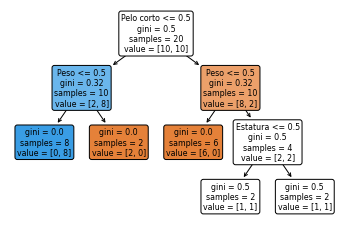

In [13]:
# Ejemplo con Gini
clf = tree.DecisionTreeClassifier(criterion='gini')
clf = clf.fit(X, y)
tree.plot_tree(clf,feature_names=df.columns[:-1],filled=True,rounded=True)

print()

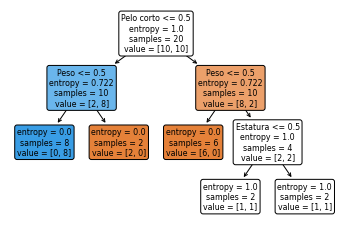

In [14]:
# Ejemplo con Entropia
clf = tree.DecisionTreeClassifier(criterion='entropy')
clf = clf.fit(X, y)
tree.plot_tree(clf,feature_names=df.columns[:-1],filled=True,rounded=True)

print()

<a id="section_reduccion_varianza"></a> 
### Reducción de Varianza
Para problemas de regresión se suele utilizar el método de Reducción de Varianza. 
Mientras más baja la varianza, más puro es el nodo, siendo el caso de Varianza cero aquel del nodo con todos los elementos iguales. Por el contrario, a medida que el nodo se vuelve más heterogéneo, aumenta su varianza. Por lo tanto, el método de Reducción de Varianza, lo que hace es calcular la varianza para cada nodo hijo, y luego la Varianza total de la partición se calcula como el promedio ponderado de las varianzas de los nodos hijos. 

$$
\begin{aligned}
Varianza_{nodo\ hijo} = \frac{1}{n}\sum (X - \mu)^{2}
\end{aligned}
$$

donde:  
- X = es el conjunto de observaciones del nodo
- $\mu$ = es la media del nodo
- n = es la cantidad de observaciones del nodo

Siendo entonces la varianza total de la partición, la suma ponderada de las varianzas de los nodos hijos:

$$
\begin{aligned}
Varianza_{total} = \frac{n_{1}*Varianza_{1}+n2*Varianza_{2}}{n_{1}+n_{2}}
\end{aligned}
$$


Veamos cómo se aplica a nuestro ejemplo. Para ello cambiaremos nuestra variable objetivo que es categórica a un formato númerico. Reemplazaremos las "M" por 1s y los "H" por 0s.

<img style="float: center;" src="img/peso_var.png">
<img style="float: center;" src="img/estatura_var.png">
<img style="float: center;" src="img/pelo_var.png">

Se observa que todos los métodos de partición utilizados son consistentes al seleccionar el atributo más conveniente a la hora de realizar la partición.  

Veamos cómo implementar un modelo de árbol de decisión que utilice reducción de varianza en Python.


In [15]:
#importamos la libreria
from sklearn import tree

# importamos el dataframe del ejemplo
df=pd.read_csv("../Data/ejemploCART.csv")
df["Peso"]=df["Peso"].apply(lambda x: x>80)
df["Estatura"]=df["Estatura"].apply(lambda x: x>180)

# separamos las variables independientes de la variable objetivo en las variables X e y respectivamente.
# convertimos la variable dependiente al tipo Int.
X = df.iloc[:,:-1].values
y = df.iloc[:,-1].replace({'H': 0, 'M': 1}).values

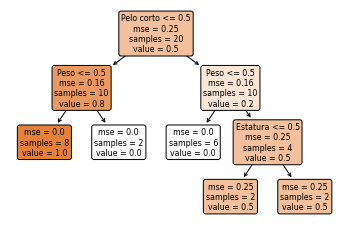

In [16]:
# Fit regression model
regr = tree.DecisionTreeRegressor()
regr.fit(X, y)

tree.plot_tree(regr,feature_names=df.columns[:-1],filled=True,rounded=True)

print()

<a id="section_overfitting"></a> 
## Underfitting y Overfitting
Dado que buscamos lograr la mayor precisión posible de nuestro modelo, queremos encontrar el punto óptimo entre la adaptación insuficiente (underfitting) y la adaptación excesiva o sobreajuste (overfitting). Visualmente, queremos alcanzar el punto mínimo de la curva de validación (roja) en la imagen que se muestra a continuación.

<img style="float: center;" src="img/underfitting-overfitting.png">

<a id="section_optimizacion"></a> 
## Optimizando Performance de los Árboles de Decisión
### Poda de árboles o Tree Pruning
Como mencionamos anteriormente, los algoritmos de árboles de decisión tienen una fuerte tendencia al sobreajuste. A fin de minimizar el sobreajuste y también reducir la complejidad de los árboles de decisión se suele aplicar la técnica de "poda". Esta técnica básicamente consiste en reducir el tamaño del árbol, ya sea mediante cualquiera de las siguientes **criterios de corte**:
- Limitando la profundidad máxima del árbol 
- Limitando el número mínimo de muestras requeridas en cada hoja
- Limitando el número mínimo de muestras necesarias para particionar.

El modelo de scikit learn pone a disposición los siguientes parámetros para determinar los criterios de corte:  

- **max_depth:** profundidad máxima del árbol. Solemos determinar una profundidad máxima para evitar que el modelo sobreajuste.  
- **min_samples_split:** número mínimo de muestras que un nodo debe contener para considerar la división. El valor predeterminado es dos. Podemos usar este parámetro para regularizar el árbol.
- **min_samples_leaf:** número mínimo de muestras necesarias para ser considerado un nodo hoja. El valor predeterminado se establece en uno. Este parámetro se utiliza como una forma alternativa de limitar el crecimiento del árbol.  
- **max_features:** número de características a considerar al buscar la mejor división. Si no se establece este valor, el árbol de decisión considerará todas las variables independientes disponibles para hacer la mejor división. 

#### Profundidad Máxima
A continuación repetimos uno de los ejemplos anteriores, pero definiendo una profundidad máxima del árbol.

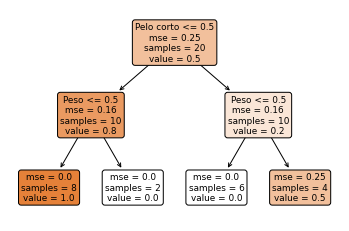

In [17]:
# Ejemplo con Reduccion de Varianza y max_depth = 2

regr = tree.DecisionTreeRegressor(max_depth=2)
regr.fit(X, y)

tree.plot_tree(regr,feature_names=df.columns[:-1],filled=True,rounded=True)

print()

#### Mínimo de Muestras en las hojas
A continuación repetimos uno de los ejemplos anteriores pero definiendo el mínimo de muestras en las hojas.

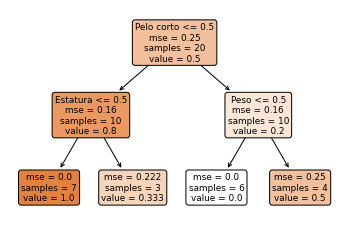

In [18]:
# Ejemplo con Reduccion de Varianza y min_samples_leaf = 3

regr = tree.DecisionTreeRegressor(min_samples_leaf=3)
regr.fit(X, y)

tree.plot_tree(regr,feature_names=df.columns[:-1],filled=True,rounded=True)

print()

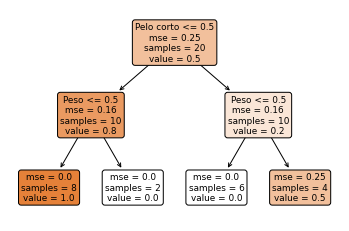

In [19]:
# Ejemplo con Reduccion de Varianza y min_samples_split = 5

regr = tree.DecisionTreeRegressor(min_samples_split=5)
regr.fit(X, y)

tree.plot_tree(regr,feature_names=df.columns[:-1],filled=True,rounded=True)

print()

**Nota:** notar que en los 3 casos, el ajuste se debe realizar empíricamente ya que si bien pueden mejorar el overfitting también pueden generar underfitting.

---

<a id="section_referencias"></a> 
## Referencias 

[volver a TOC](#section_toc)


https://www.youtube.com/watch?v=hfGLGEjEATs

https://sitiobigdata.com/2019/12/14/arboles-de-decision-en-machine-learning-parte-2/
    
https://ligdigonzalez.com/arboles-de-decision-regresion-teoria-machine-learning/

https://ligdigonzalez.com/arboles-de-decision-clasificacion-teoria-machine-learning/